In [272]:
def get_Kernel(N):
    K=np.zeros((N,N))
    
    for m in range(1,N+1):
        for n in range(1,N+1):
            K[m-1,n-1]=-2*n/(m*m+n*n)


            
    
    return K


def Kernel_it(R):
    N=R.shape[0]
    u=np.zeros((N,))
    
    K=get_Kernel(N)
    
    for m in range(1,N+1):
        for n in range(1,N+1):
            #u[m-1]=u[m-1]-2*n*R[n-1]/(m*m+n*n)
            u[m-1]=u[m-1]+K[m-1,n-1]*R[n-1]
            
            
    
    return u


def Adding_sig(u,sig):
    N=u.shape[0]
    return u+np.random.normal(0,sig,N)
    
def chi2(G,sig,A):
    G2=Kernel_it(A)
    N=G.shape[0]
    output=0
    for i in range(N):
        output=output+(G[i]-G2[i])**2
        
    return output/(sig**2)

def S(m,A):
    # m must be a postive function! zero is not okay.
    N=A.shape[0]
    if(N!=m.shape[0]):
        print("error, size of m is not size of A")
    
    output=0
    for i in range(N):
        # 0*Log(0) is problematic for computers
        # negative A[i] is also problematic for log(A[i])
        if(A[i]<m[i]):
            output=output-(A[i]-m[i])**2/(2*m[i])+(A[i]-m[i])**3/(6*m[i]**2)-(A[i]-m[i])**4/(12*m[i]**3)
        else:
            output=output+A[i]-m[i]-A[i]*np.log(A[i]/m[i])

            
    if(output>0):
        print("postive S, debug")
            
        
    return output
    

def Q(alpha,m,G,sig,A):
    return alpha*S(m,A)-0.5*chi2(G,sig,A)
# S <= 0     , the larger the better
# chi2 >= 0  , the smaller the better
# Q <= 0     , the larger the better





def draw_A(alpha,m,G,sig,A):
    
    N=A.shape[0]
    new_A=A+np.random.normal(0,0.1,N)
    #new_A=np.matmul(projector_6,new_A)
    # 有一些本征方向，应该按照这些方向进行迭代更新
    
    
    newQ=Q(alpha,m,G,sig,new_A)
    oldQ=Q(alpha,m,G,sig,A)
    
    output=A

    if(newQ>oldQ):
        output=new_A
    else:
        if(np.random.uniform() < np.exp(newQ-oldQ)):
            output=new_A
            
    return output

def draw_alpha(alpha,m,G,sig,A):
    
    N=A.shape[0]
    scale=-1/S(m,A)
    if(scale<0):
        print(S(m,A))
    new_alpha=np.random.gamma(N/2, scale=1)

    return new_alpha
    
    

In [271]:
def gibbs(G,sig,m,iters):
    N=G.shape[0]
    
    trace_A=np.zeros((iters, N))
    trace_alpha=np.zeros((iters,))
    
    #初始很有问题
    A=m+np.random.normal(0,0.01,N)
    alpha=100*N/2
    
    
    for i in range(iters):
        if(i%1000==0):
            print(i)
            #m=np.abs(A)+0.01
        #for ii in range(5):
        A=draw_A(alpha,m,G,sig,A)
            
        alpha=draw_alpha(alpha,m,G,sig,A)
        
        trace_A[i,:]=A
        trace_alpha[i]=alpha
    
    
    return trace_A, trace_alpha

conditional number:
7.43781571133e+17


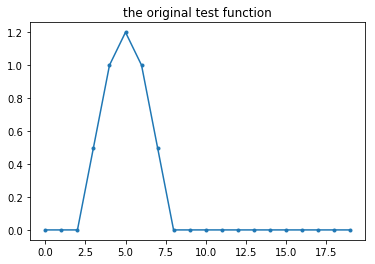

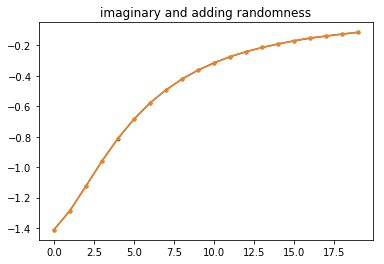

28.2710727577
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


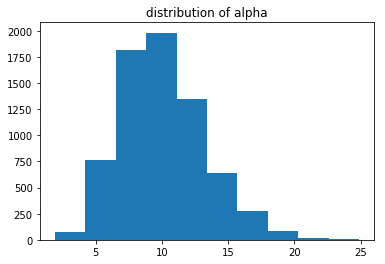

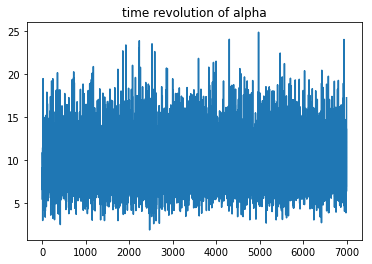

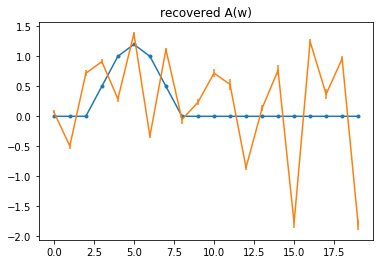

In [275]:
N=20
R=np.zeros((N,))
R[3]=0.5
R[4]=1
R[5]=1.2
R[6]=1
R[7]=0.5
import matplotlib.pyplot as plt

print("conditional number:")
print(np.linalg.cond(get_Kernel(N)))


plt.plot(R,'.-')
plt.title("the original test function")
plt.show()
u=Kernel_it(R)

plt.plot(u,'.-')

sig=0.001


u2=Adding_sig(u,sig)
plt.plot(u2,'.-')

plt.title("imaginary and adding randomness")

plt.show()


print(chi2(u2,sig,R))

m=np.ones((N,))*1

steps=10000
start=3000

trace_A, trace_alpha=gibbs(u2,sig,m,steps)
plt.hist(trace_alpha[start:steps])
plt.title("distribution of alpha")

plt.show()
plt.plot(trace_alpha[start:steps])
plt.title("time revolution of alpha")

plt.show()

plt.plot(R,'.-')
plt.errorbar( np.arange(N),np.mean(trace_A[start:steps,:], axis=0), yerr=np.std(trace_A[start:steps,:], axis=0) )
plt.title("recovered A(w)")
plt.show()


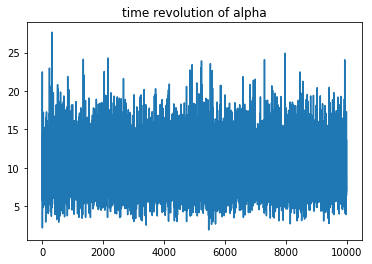

In [276]:
plt.plot(trace_alpha[0:steps])
plt.title("time revolution of alpha")

plt.show()



conditional number:
1.76381744994e+18


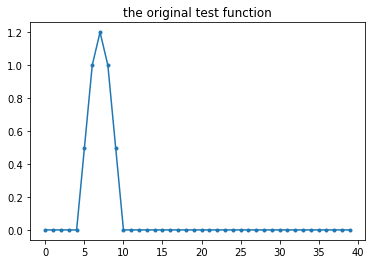

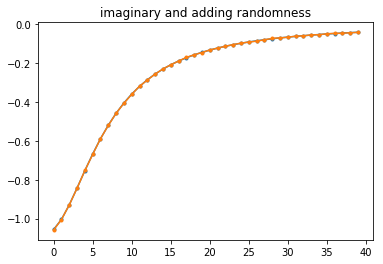

43.9535157688
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


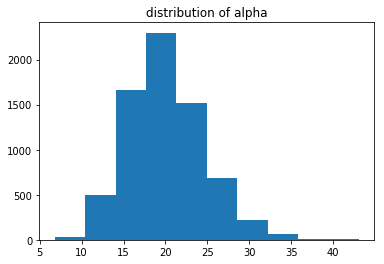

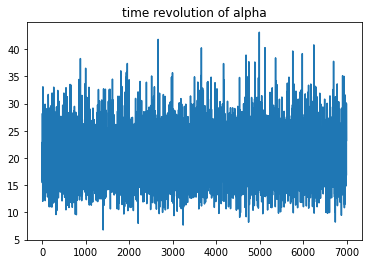

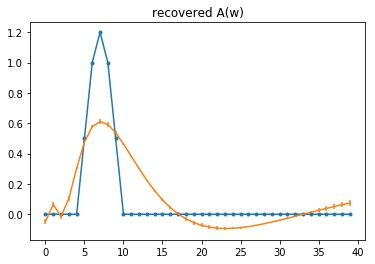

In [258]:
N=40
R=np.zeros((N,))
R[5]=0.5
R[6]=1
R[7]=1.2
R[8]=1
R[9]=0.5
import matplotlib.pyplot as plt

print("conditional number:")
print(np.linalg.cond(get_Kernel(N)))


plt.plot(R,'.-')
plt.title("the original test function")
plt.show()
u=Kernel_it(R)

plt.plot(u,'.-')

sig=0.001


u2=Adding_sig(u,sig)
plt.plot(u2,'.-')

plt.title("imaginary and adding randomness")

plt.show()


print(chi2(u2,sig,R))

m=np.ones((N,))*0.3

steps=10000
start=3000

trace_A, trace_alpha=gibbs(u2,sig,m,steps)
plt.hist(trace_alpha[start:steps])
plt.title("distribution of alpha")

plt.show()
plt.plot(trace_alpha[start:steps])
plt.title("time revolution of alpha")

plt.show()

plt.plot(R,'.-')
plt.errorbar( np.arange(N),np.mean(trace_A[start:steps,:], axis=0), yerr=np.std(trace_A[start:steps,:], axis=0) )
plt.title("recovered A(w)")
plt.show()


conditional number:
1.76381744994e+18


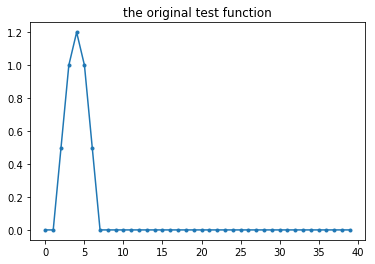

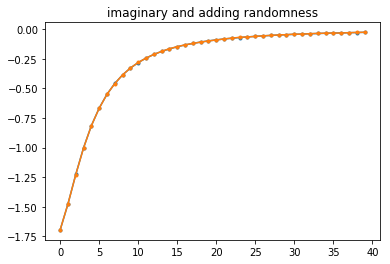

33.0928973698
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


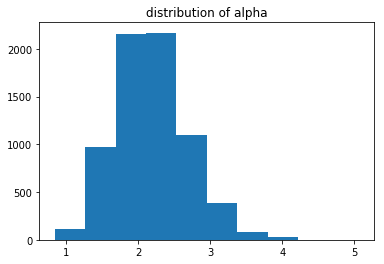

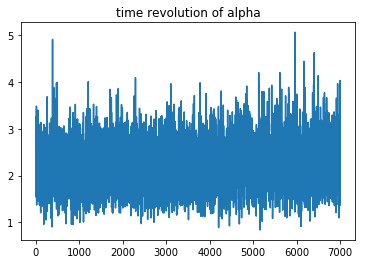

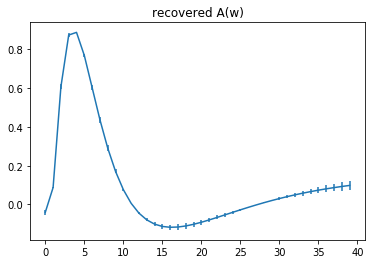

In [237]:
N=40
R=np.zeros((N,))
R[2]=0.5
R[3]=1
R[4]=1.2
R[5]=1
R[6]=0.5
import matplotlib.pyplot as plt

print("conditional number:")
print(np.linalg.cond(get_Kernel(N)))


plt.plot(R,'.-')
plt.title("the original test function")
plt.show()
u=Kernel_it(R)

plt.plot(u,'.-')

sig=0.001


u2=Adding_sig(u,sig)
plt.plot(u2,'.-')

plt.title("imaginary and adding randomness")

plt.show()


print(chi2(u2,sig,R))

m=np.ones((N,))*0.2

steps=10000
start=3000

trace_A, trace_alpha=gibbs(u2,sig,m,steps)
plt.hist(trace_alpha[start:steps])
plt.title("distribution of alpha")

plt.show()
plt.plot(trace_alpha[start:steps])
plt.title("time revolution of alpha")

plt.show()
plt.errorbar( np.arange(N),np.mean(trace_A[start:steps,:], axis=0), yerr=np.std(trace_A[start:steps,:], axis=0) )
plt.title("recovered A(w)")
plt.show()


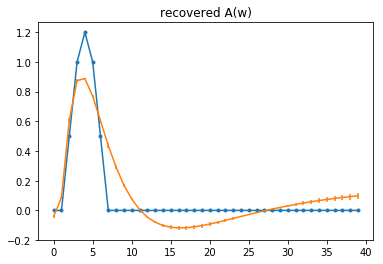

In [238]:
plt.plot(R,'.-')

plt.errorbar( np.arange(N),np.mean(trace_A[start:steps,:], axis=0), yerr=np.std(trace_A[start:steps,:], axis=0) )
plt.title("recovered A(w)")
plt.show()

In [134]:
def get_Kernel(N):
    K=np.zeros((N,N))
    
    for m in range(1,N+1):
        for n in range(1,N+1):
            K[m-1,n-1]=-2*n/(m*m+n*n)
    
    return K

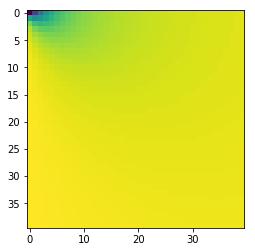

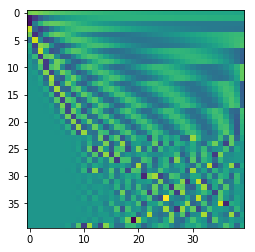

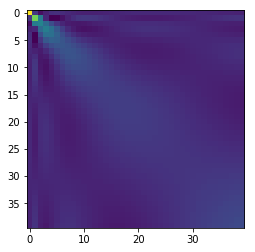

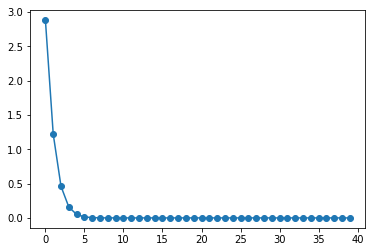

In [233]:
K=get_Kernel(N)
u,s,vH=np.linalg.svd(K)

vH0=vH+0
vH0[6:N,:]=0

plt.imshow(K)
plt.show()

plt.imshow(vH)
plt.show()
v0=np.transpose(vH0)

projector_6=np.matmul(v0,vH0)
plt.imshow(projector_6)
plt.show()

plt.plot(s,'o-')
plt.show()
    


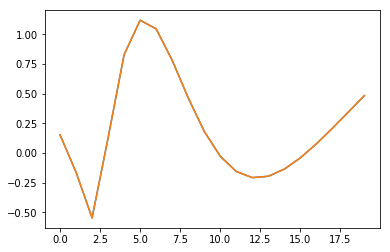

In [230]:
y=np.mean(trace_A[start:steps,:], axis=0)
plt.plot(y)
plt.plot(np.matmul(projector_6,y))
plt.show()